### Dependencies and custom functions

_Dependencies_

In [1]:
import serial as sl
import os
import time
import numpy as np
import json
import threading
from ipywidgets import BoundedFloatText, Button, VBox, HBox, Layout
from IPython.display import display
from modules.MyStage import MyStage, MyAxes
from Milling_Rv052 import MovementButtons, MillingTask, drill_through_hole
from Milling_Rv052 import R, calculate_transforms, transform_coordinates

_Object Instances and process constants_

In [2]:
# ==================================================
# Initilise Micos Corvus Eco
# ==================================================
Stage = MyStage(os, sl)
x = MyAxes(Stage, x=True)
y = MyAxes(Stage, y=True)
z = MyAxes(Stage, z=True)
xy = MyAxes(Stage, x=True, y=True)
xz = MyAxes(Stage, x=True, z=True)
xyz = MyAxes(Stage, x=True, y=True, z=True)

# ==================================================
# Load design coordinates for milling
# ==================================================
with open('coords.txt') as coords:
    coordinates = json.load(coords)   
    
# ==================================================
# Set home to 2.5 mm above substrate surface
substrate_thickness = 5.
# ==================================================    
z.move_global(-abs(substrate_thickness-3.95)-2.5)
Stage.set_home()


 Stage module loaded - do "dmesg | grep tty" to list Ports of connected serial devices:

Port from output : 

 Try to connect to SerialPort: 
/dev/ttyUSB0
new position:
[0.0, 0.0, -3.55]


In [63]:
y.move_relative(-10)

new position:
[-30.0, -10.0, 0.0]


----

# Stage movements

In [3]:
MovementButtons(Stage)

HBox(children=(VBox(children=(Button(icon='map-marker', layout=Layout(height='60px', width='60px'), style=ButtonStyle()), Button(icon='home', layout=Layout(height='60px', width='60px'), style=ButtonStyle()))), HBox(children=(BoundedFloatText(value=1.0, description='Z-Step:', layout=Layout(width='180px'), max=10.0, step=0.01), VBox(children=(Button(icon='chevron-up', layout=Layout(height='60px', width='60px'), style=ButtonStyle()), Button(icon='chevron-down', layout=Layout(height='60px', width='60px'), style=ButtonStyle())))), layout=Layout(align_items='center')), HBox(children=(VBox(children=(BoundedFloatText(value=1.0, description='X-Step:', layout=Layout(width='180px'), max=10.0, step=0.01), BoundedFloatText(value=1.0, description='Y-Step:', layout=Layout(width='180px'), max=10.0, step=0.01))), VBox(children=(HBox(children=(Button(layout=Layout(height='40px', width='40px'), style=ButtonStyle()), Button(icon='chevron-up', layout=Layout(height='60px', width='60px'), style=ButtonStyle()), Button(layout=Layout(height='40px', width='40px'), style=ButtonStyle())), layout=Layout(align_items='flex-end')), HBox(children=(Button(icon='chevron-left', layout=Layout(height='60px', width='60px'), style=ButtonStyle()), Button(disabled=True, icon='arrows', layout=Layout(height='60px', width='60px'), style=ButtonStyle()), Button(icon='chevron-right', layout=Layout(height='60px', width='60px'), style=ButtonStyle()))), HBox(children=(Button(layout=Layout(height='40px', width='40px'), style=ButtonStyle()), Button(icon='chevron-down', layout=Layout(height='60px', width='60px'), style=ButtonStyle()), Button(layout=Layout(height='40px', width='40px'), style=ButtonStyle())))), layout=Layout(align_items='center'))), layout=Layout(align_items='center'))), layout=Layout(align_items='center'))

new position:
[0.0, 0.0, -1.0]
new position:
[0.0, 0.0, 0.0]


IndexError: list index out of range

new position:
[1.0, 0.0, 0.0]
new position:
[2.0, 0.0, 0.0]
new position:
[2.0, 1.0, 0.0]
new position:
[2.0, 0.0, 0.0]
new position:
[2.0, -1.0, 0.0]
new position:
[2.0, -2.0, 0.0]
new position:
[3.0, -2.0, 0.0]
new position:
[4.0, -2.0, 0.0]
new position:
[5.0, -2.0, 0.0]
new position:
[6.0, -2.0, 0.0]
new position:
[16.0, -2.0, 0.0]
[16.0, -2.0, 0.0]
new position:
[10.0, 0.0, 0.0]
new position:
[10.0, 0.0, 0.0]
new position:
[10.0, 0.0, 0.0]


IndexError: list index out of range

IndexError: list index out of range

new position:
[10.0, 0.0, 0.0]
new position:
[12.0, 0.0, 0.0]
new position:
[12.0, 2.0, 0.0]
new position:
[12.0, 3.0, 0.0]
new position:
[12.0, 3.0, 1.0]
new position:
[12.0, 3.0, 2.0]
new position:
[13.0, 3.0, 2.0]
[13.0, 3.0, 2.0]
[0.0, 0.0, 0.0]
new position:
[10.0, 0.0, 0.0]
new position:
[18.0, 0.0, 0.0]
new position:
[18.0, 1.0, 0.0]
new position:
[18.0, 0.0, 0.0]
new position:
[18.0, -1.0, 0.0]
new position:
[18.0, -2.0, 0.0]
new position:
[18.0, -1.0, 0.0]
new position:
[18.0, -1.59, 0.0]
new position:
[18.0, -1.0, 0.0]
new position:
[18.0, -1.3, 0.0]
new position:
[18.0, -1.3, 1.0]
new position:
[18.0, -1.3, 2.0]


IndexError: list index out of range

new position:
[-30.58375, -8.43892, 1.0]
new position:
[-30.58375, -8.43892, 1.5]
new position:
[-30.58375, -8.43892, 1.75]
new position:
[-30.58375, -8.43892, 2.0]
new position:
[-30.58375, -8.43892, 2.25]
new position:
[-30.58375, -8.43892, 2.375]
new position:
[-30.58375, -8.43892, -1.125]


----
# Reference Points

Start off with 1 mm end-mill. Move with Stage to reference points as indicated in schematic:

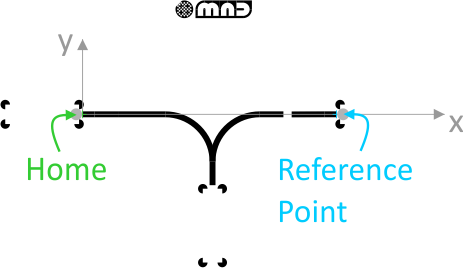

In [11]:
from IPython.display import Image
Image("refpoints.png")

## Set Home
_Use Stage movements above to get there (and approach surface), then:_

In [10]:
z.move_global(0)
Stage.set_home()

new position:
[13.0, 3.0, 0.0]


## Set Reference Point  
_Use Stage movements above to get there (and approach surface), then:_

In [11]:
z.move_global(0)
reference_point = Stage.get_pos()

new position:
[18.0, -1.3, 0.0]


## transform coordinates

In [12]:
transforms = calculate_transforms(reference_point)
# and re-adjust Home:
Stage.go_home()
z.move_global(0)
new_home = transform_coordinates([(.55, 0)], transforms)[0]
xyz.move_global(*new_home)
Stage.set_home()

new position:
[0.0, 0.0, 0.0]
new position:
[0.0, 0.0, 0.0]
new position:
[0.43805, 0.03164, 0.0]


----
# Perform Milling tasks
----
## FO-grooves

In [5]:
def zfx(x):
    return 0*x
transforms = [0.01098856868273362,
             zfx,
             0.8053583569878551]

In [14]:
for points in coordinates['single sensor']['FO-grooves']:
    xy_coords = transform_coordinates(points, transforms)
    print('Starting to work on FO-groove at', xyz)
    FOGroove = MillingTask(Stage, xy_coords, depth = 0.6,
                                       zfx = transforms[1],
                                       substrate_thickness = 5.,
                                       tool_diameter = 1.,
                                       test=False)    

Starting to work on FO-groove at [[0.0, 0.0, 0.0], [-1.5929203539823007, -0.11504424778761062, -0.0]]
Maximum Velocity set to 1.000000.
positive movement: False
horizontal movement: True
Start Dremel. Confirm with OK to proceed...Ok
new position:
[0.0, 0.0, 0.0]
new position:
[0.0, 0.0, 1.5]
new position:
[-0.7, -0.05056, 1.5]
Reached local Origin. Confirm with y/N to proceed...y
Maximum Velocity set to 0.100000.
new position:
[-0.7, -0.05056, 3.1]
new position:
[-2.29292, -0.1656, 3.1]
new position:
[-2.29292, -0.1656, 3.1]
incrementing by:
-0.04081632653061224 -0.0029478458049886623 0.00041653650352801996
new position:
[-2.33374, -0.16855, 3.10042]
incrementing by:
-0.04081632653061224 -0.0029478458049886623 0.0012501304526111312
new position:
[-2.37455, -0.1715, 3.10167]
incrementing by:
-0.04081632653061225 -0.0029478458049886627 0.002085290490802194
new position:
[-2.41537, -0.17444, 3.10375]
incrementing by:
-0.040816326530612235 -0.002947845804988662 0.0029230716020742786
new po

new position:
[19.74334, 1.42591, 3.12684]
incrementing by:
0.040816326530612235 0.00294784580498866 0.007189777384412066
new position:
[19.78416, 1.42886, 3.13403]
incrementing by:
0.040816326530612235 0.0029478458049886636 0.008066877319320653
new position:
[19.82497, 1.43181, 3.14209]
incrementing by:
0.040816326530612235 0.00294784580498866 0.008954868391532367
new position:
[19.86579, 1.43475, 3.15105]
incrementing by:
0.04081632653061229 0.0029478458049886636 0.00985516181120305
new position:
[19.90661, 1.4377, 3.1609]
incrementing by:
0.04081632653061218 0.0029478458049886566 0.010769258645222157
new position:
[19.94742, 1.44065, 3.17167]
incrementing by:
0.04081632653061229 0.0029478458049886636 0.011698763941848211
new position:
[19.98824, 1.4436, 3.18337]
incrementing by:
0.04081632653061218 0.0029478458049886566 0.012645402805435912
new position:
[20.02905, 1.44655, 3.19602]
incrementing by:
0.04081632653061229 0.0029478458049886636 0.013611038821418786
new position:
[20.069

new position:
[9.3337, -7.29607, 3.29299]
incrementing by:
0.0029478458049886497 -0.04081632653061218 0.019931783035838313
new position:
[9.33665, -7.33689, 3.31292]
incrementing by:
0.0029478458049886497 -0.04081632653061229 0.021099724588220514
new position:
[9.3396, -7.37771, 3.33402]
incrementing by:
0.0029478458049886497 -0.04081632653061229 0.022310064448172184
new position:
[9.34255, -7.41852, 3.35633]
incrementing by:
0.0029478458049886636 -0.04081632653061229 0.02356749857864071
new position:
[9.34549, -7.45934, 3.37989]
incrementing by:
0.002947845804988636 -0.04081632653061207 0.024877375380431888
new position:
[9.34844, -7.50015, 3.40477]
incrementing by:
0.0029478458049886497 -0.04081632653061229 0.02624582506402562
new position:
[9.35139, -7.54097, 3.43102]
incrementing by:
0.0029478458049886636 -0.04081632653061229 0.027679921418593656
new position:
[9.35434, -7.58179, 3.4587]
incrementing by:
0.0029478458049886497 -0.04081632653061229 0.029187886102171712
new position:


--- 
## Though holes

Change tool to 1 mm drill bit (_Datron 0068.210_)

In [42]:
# reload coordinates to retrieve updated through hole coordinates
with open('coords.txt') as coords:
    coordinates = json.load(coords)     

for point in coordinates['single sensor']['through holes']:
    xyz.move_global(*point)
    drill_through_hole(Stage, z, point)

new position:
[-4.2929, -0.31005, 0.0]
Reached local origin. Proceed? (y/n)y
Maximum Velocity set to 0.250000.
new position:
[-4.2929, -0.31005, 1.5]
new position:
[-4.2929, -0.31005, 1.0]
more? y/ny
new position:
[-4.2929, -0.31005, 2.5]
new position:
[-4.2929, -0.31005, 2.0]
more? y/ny
new position:
[-4.2929, -0.31005, 3.5]
new position:
[-4.2929, -0.31005, 3.0]
more? y/ny
new position:
[-4.2929, -0.31005, 4.5]
new position:
[-4.2929, -0.31005, 4.0]
more? y/ny
new position:
[-4.2929, -0.31005, 5.5]
new position:
[-4.2929, -0.31005, 5.0]
more? y/ny
new position:
[-4.2929, -0.31005, 6.5]
new position:
[-4.2929, -0.31005, 6.0]
more? y/ny
new position:
[-4.2929, -0.31005, 7.5]
new position:
[-4.2929, -0.31005, 7.0]
more? y/nn
Maximum Velocity set to 1.000000.
new position:
[-4.2929, -0.31005, 0.0]
new position:
[21.4168, 1.54678, 0.0]
Reached local origin. Proceed? (y/n)y
Maximum Velocity set to 0.250000.
new position:
[21.4168, 1.54678, 1.5]
new position:
[21.4168, 1.54678, 1.0]
more? y

---
## Sensing Area

_Change tool_, then 
### adjust z-level
then go to xy-origin and set home

In [60]:
xy.move_global(0,0)
Stage.set_home()

new position:
[0.0, 0.0, -1.125]


### engrave sensing area

In [167]:
for point in coordinates['single sensor']['sensing area']:
    xy_coords= transform_coordinates(point, transforms)
    print('Starting to work on Sensing Area at', xyz)
    FOGroove = MillingTask(Stage, xy_coords, depth = .2,
                                       zfx = transforms[1],
                                       tool_diameter = .6,
                                       sensor=True,
                                       test=False)

Starting to work on Sensing Area at [[13.97654867256637, -0.24911504424778752, 0.0], [13.972123893805307, 0.15353982300884955, 0.0]]


TypeError: object() takes no parameters